# Creating Maps 🌍

If you made it to this point, then you should have understood how STL specifications are defined and how you can work with them in code. before delving into how to plan trajectroies that satisfy a given STL specification, we need to understand how to create maps and workspaces within which our robot will live.

A workspace is nothing but the bounded state within which your robot state will leave. This, as you might expect, is defined again by a polytope. For the sake of simplicity we here consider a simple single integrator for which we create a simple workspace and a map (i.e. a workspace with obstacles)

(<Figure size 1000x1000 with 1 Axes>, <Axes: xlabel='X', ylabel='Y'>)

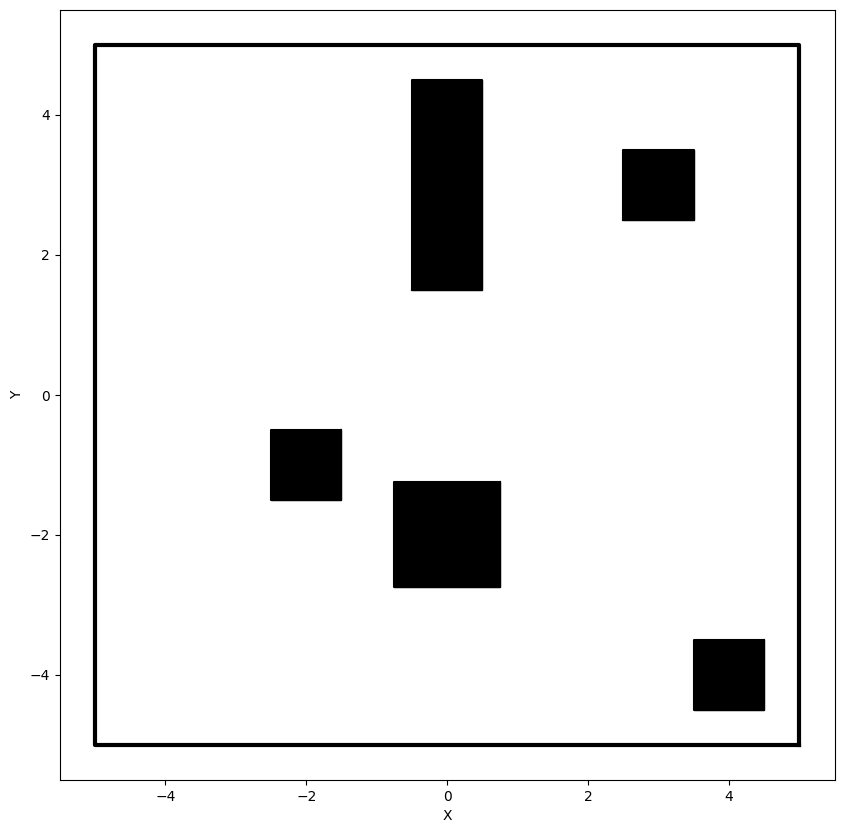

In [18]:
from   matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)

from stl_tool.stl                     import GOp, FOp, TasksOptimizer, ContinuousLinearSystem, BoxBound2d
from stl_tool.environment             import Map
from stl_tool.polyhedron                import Box2d

from stl_tool.planners import StlRRTStar
from json import loads
import os 


##########################################################
# Create work space and mapo
##########################################################
workspace     = Box2d(x = 0,y = 0,size = 10) # square 10x10 (this is a 2d workspace, so the system it refers to must be 2d)
map           = Map(workspace = workspace) # the map object contains the workpace, but it also contains the obstacles of your environment.

# load obstacles 

# create obstacles 
# some simple boxes
map.add_obstacle(Box2d(x = 3,y = 3,size = 1))
map.add_obstacle(Box2d(x = 4,y = -4,size = 1))
map.add_obstacle(Box2d(x = -2,y = -1,size = 1))
map.add_obstacle(Box2d(x = 0,y = -2,size = 1.5))
# you can create some rectangles even
map.add_obstacle(Box2d(x = 0,y = 3,size = [1,3]))

map.draw()

We can now create some specification and visualize where the predicates are located.

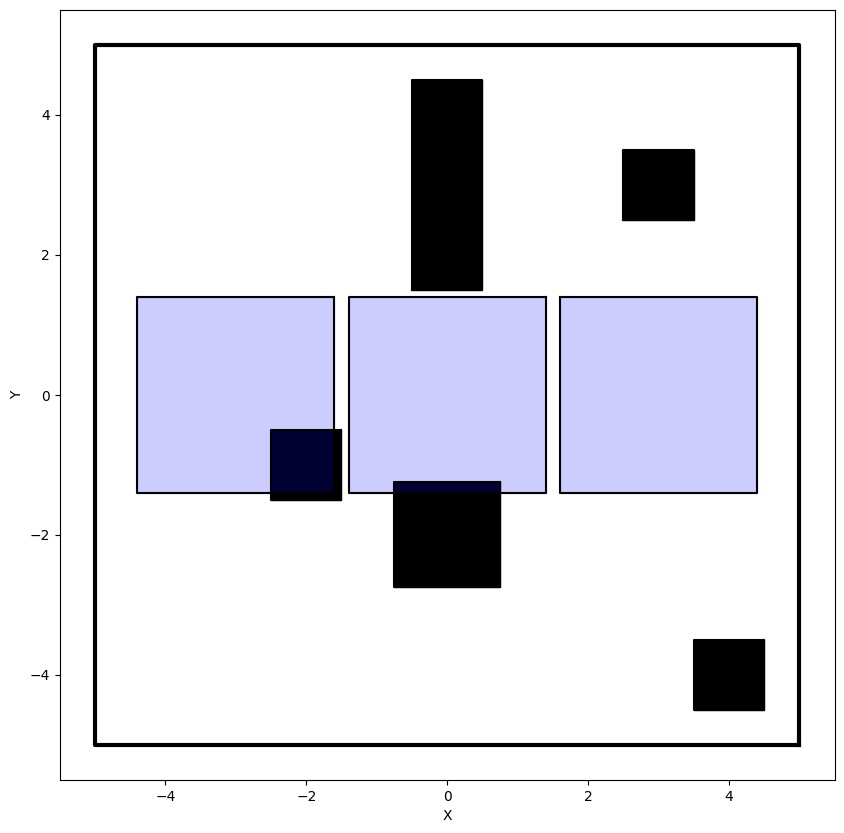

In [19]:
##########################################################
# Create work space and mapo
##########################################################
workspace     = Box2d(x = 0,y = 0,size = 10) # square 10x10 (this is a 2d workspace, so the system it refers to must be 2d)
map           = Map(workspace = workspace) # the map object contains the workpace, but it also contains the obstacles of your environment.

# load obstacles 

# create obstacles 
# some simple boxes
map.add_obstacle(Box2d(x = 3,y = 3,size = 1))
map.add_obstacle(Box2d(x = 4,y = -4,size = 1))
map.add_obstacle(Box2d(x = -2,y = -1,size = 1))
map.add_obstacle(Box2d(x = 0,y = -2,size = 1.5))
# you can create some rectangles even
map.add_obstacle(Box2d(x = 0,y = 3,size = [1,3]))

map.draw()


##########################################################
# STL specifications
##########################################################
center         = np.array([-0., 0.])
box_predicate  = BoxBound2d( size = 2.8, center = center,name="some nice predicate") # creates a predicate for a bounded box over the first two dimensions
box2_predicate = BoxBound2d( size = 2.8, center = center + np.array([-3,0.]), name= "another one") # creates a predicate for a bounded box over the first two dimensions
box3_predicate = BoxBound2d( size = 2.8, center = center + np.array([3,0.]),name="the third one") # creates a predicate for a bounded box over the first two dimensions
formula        = (GOp(10.,14.) >> box_predicate)  & (FOp(17.,20.) >> box2_predicate) & (FOp(29.,30.) >> box3_predicate) 

fig,ax = map.draw_formula_predicate(formula = formula, alpha =0.2)
plt.show()

## Creating maps with GUI

Creating maps manually is is very tedious. You can create easily some maps with a simple GUI. To do so, just make a separate script and fill in these simple line

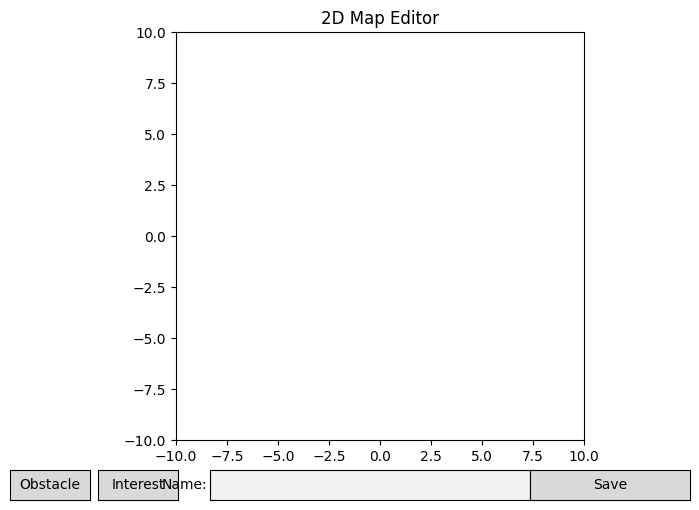

In [20]:
from stl_tool.environment import MapEditor2D 
editor = MapEditor2D(bounds=(-10,10,-10,10))
boxes = editor.run()

At this point you should be able to create a simple map as shown by the gift below.


![Alt Text](_static/Screencast-from-05-16-2025-01_35_02-PM.gif)

Once you click save you will be left with a file that is called `map2d.json` which will look something like this.

In [21]:
[
  {
    "name": "obstacle_1",
    "type": "obstacle",
    "center_x": 1.5643623591168732,
    "center_y": 4.070489810097268,
    "size_x": 1.8623784159333017,
    "size_y": 4.312876331635014
  },
  {
    "name": "obstacle_2",
    "type": "obstacle",
    "center_x": -4.537377450980391,
    "center_y": -1.2225856878184347,
    "size_x": 10.047041454377025,
    "size_y": 1.5683186660490964
  },
  {
    "name": "obstacle_3",
    "type": "obstacle",
    "center_x": 6.979962752817659,
    "center_y": -6.3441263316350165,
    "size_x": 2.4014879573876797,
    "size_y": 5.83218503937008
  },
  {
    "name": "obstacle_4",
    "type": "obstacle",
    "center_x": -4.561882430137409,
    "center_y": -6.687196039833256,
    "size_x": 6.665354330708659,
    "size_y": 1.3232688744789254
  },
  {
    "name": "interest_5",
    "type": "interest",
    "center_x": -5.738121429674232,
    "center_y": 5.271233788791106,
    "size_x": 2.450497915701714,
    "size_y": 3.185647290412227
  },
  {
    "name": "interest_6",
    "type": "interest",
    "center_x": 6.710407982090471,
    "center_y": 3.0412806855025476,
    "size_x": 2.3524779990736455,
    "size_y": 3.724756831866607
  },
  {
    "name": "interest_7",
    "type": "interest",
    "center_x": 2.1524818588852845,
    "center_y": -6.760710977304307,
    "size_x": 2.352477999073642,
    "size_y": 4.410896248263084
  }
]

[{'name': 'obstacle_1',
  'type': 'obstacle',
  'center_x': 1.5643623591168732,
  'center_y': 4.070489810097268,
  'size_x': 1.8623784159333017,
  'size_y': 4.312876331635014},
 {'name': 'obstacle_2',
  'type': 'obstacle',
  'center_x': -4.537377450980391,
  'center_y': -1.2225856878184347,
  'size_x': 10.047041454377025,
  'size_y': 1.5683186660490964},
 {'name': 'obstacle_3',
  'type': 'obstacle',
  'center_x': 6.979962752817659,
  'center_y': -6.3441263316350165,
  'size_x': 2.4014879573876797,
  'size_y': 5.83218503937008},
 {'name': 'obstacle_4',
  'type': 'obstacle',
  'center_x': -4.561882430137409,
  'center_y': -6.687196039833256,
  'size_x': 6.665354330708659,
  'size_y': 1.3232688744789254},
 {'name': 'interest_5',
  'type': 'interest',
  'center_x': -5.738121429674232,
  'center_y': 5.271233788791106,
  'size_x': 2.450497915701714,
  'size_y': 3.185647290412227},
 {'name': 'interest_6',
  'type': 'interest',
  'center_x': 6.710407982090471,
  'center_y': 3.0412806855025476,

You can the generate a map automatiacally and easily by reading this file as

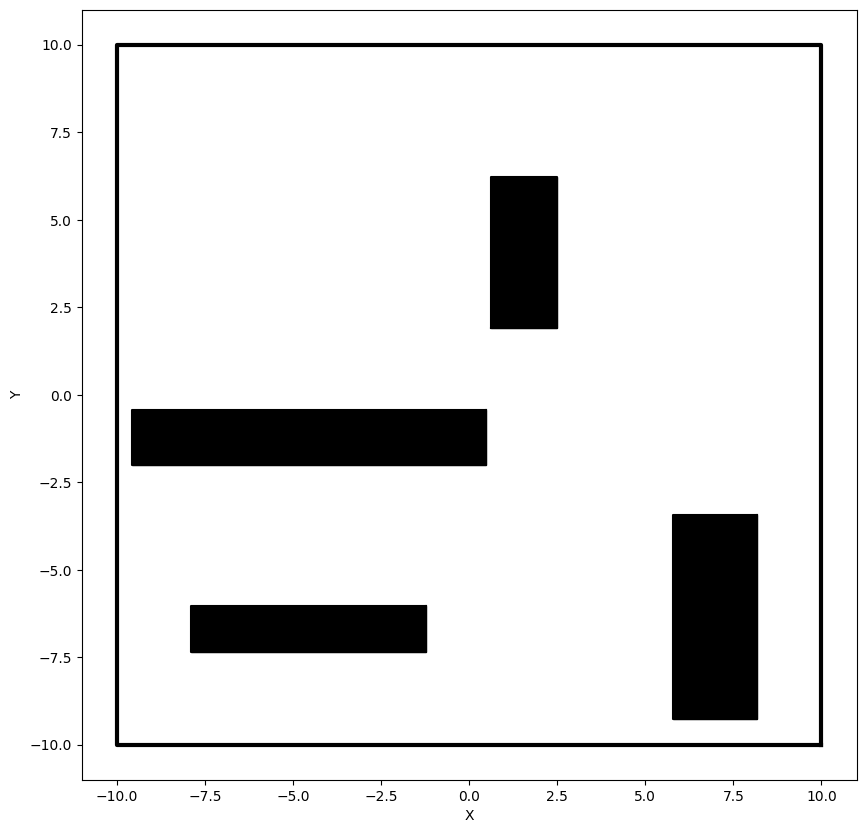

In [ ]:
file_path =  "maps/map2d.json"

##########################################################
# Create work space and mapo
##########################################################
workspace     = Box2d(x = 0,y = 0,size = 20) # square 10x10 (this is a 2d workspace, so the system it refers to must be 2d)
map           = Map(workspace = workspace) # the map object contains the workpace, but it also contains the obstacles of your environment.

map_json = loads(open(file_path,mode="r").read())
map.read_from_json(file_path)
map.draw() # draw if you want :)
map.enlarge_obstacle(border_size=0.2) # enlarge obstacles

To use the predicates just read the json file and create a formula.

In [23]:
named_map = {item["name"]: item for item in map_json}



intrest_point = named_map["interest_5"]
p2 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_2")
# third interest point
intrest_point = named_map["interest_6"]
p3 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_3")

intrest_point = named_map["interest_7"]
p4 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_3")

formula = (GOp(10.,14.) >> p2)  & (FOp(17.,20.) >> p3) & (FOp(29.,30.) >> p4)

A complete example is then given as

[[0.0892947  0.08962931]
 [0.01255853 0.02072429]]


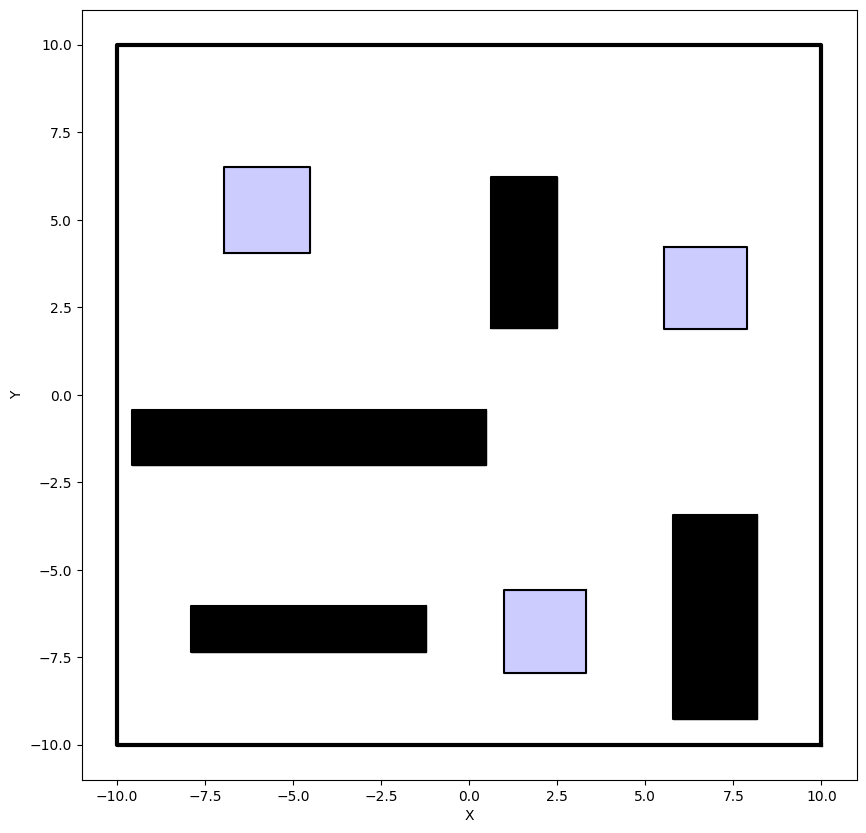

In [26]:
##########################################################
# Create work space and mapo
##########################################################
workspace     = Box2d(x = 0,y = 0,size = 20) # square 20x20
map           = Map(workspace = workspace)

# load obstacles 
file_path = os.path.join("map2d.json")
map_json = loads(open(file_path,mode="r").read())
map.read_from_json(file_path)
map.draw() # draw if you want :)
map.enlarge_obstacle(border_size=0.2) # enlarge obstacles

##########################################################
# system and dynamics
##########################################################
A             = np.random.rand(2,2)*0.1
B             = np.diag([1.5,1.5])
dt            = 1.
system        = ContinuousLinearSystem(A, B, dt = dt)
max_input     = 5.
input_bounds  = Box2d(x = 0.,y = 0.,size = max_input*2) 

print(A)
##########################################################
# STL specifications
##########################################################

named_map = {item["name"]: item for item in map_json}

intrest_point = named_map["interest_5"]
p2 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_2")
# third interest point
intrest_point = named_map["interest_6"]
p3 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_3")

intrest_point = named_map["interest_7"]
p4 = BoxBound2d(size = intrest_point["size_x"], center = np.array([intrest_point["center_x"], intrest_point["center_y"]]), name = "interest_3")

formula = (GOp(10.,14.) >> p2)  & (FOp(17.,20.) >> p3) & (FOp(29.,30.) >> p4)



fig,ax = map.draw_formula_predicate(formula = formula, alpha =0.2)